In [40]:
import re #regular expression package

import pandas as pd 
import nltk #a plateform with tools for text processing, and other
            #package to do sentiment analysis with.
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('movie_reviews')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Sky\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Sky\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


True

In [2]:
comments = pd.read_csv('Comments.csv') #read a comma-separated values file
                                        #which are comments that are scraped
                                        #from the Reddit API.

In [ ]:
comments.head(3) #get the first 3 rows

In [ ]:
sample = comments.Reply.iloc[9] #text comment at row 10 on Reply column
sample

In [ ]:
re.sub(r'\(?http\S+', '', sample) #remove the link in a text.
                                # using a regular expression.
                                #In this case, anything that starts
                                # with 'http' and the 'S+' captures everthing
                                # that is not a space.
                                #Then we will replace it with a blankfield.
                                #The'(?' means the bracket can be there or not.

In [ ]:
sample = comments.Reply.iloc[8]
sample

In [ ]:
word_tokenized = nltk.word_tokenize(sample) #word_tokenize function in nltk package
                                            #just break the text into individual word.
                                            #It recognises the escape characters
word_tokenized

In [ ]:
' '.join(word_tokenized) #take in a list, and join every element in this list
                            #with a blank space (' ') separator. 

In [ ]:
sample = ['more', 'is', 'said', 'than', 'done', 'is', 'said', 'than']

In [ ]:
from nltk.collocations import *

bigram_measures = nltk.collocations.BigramAssocMeasures()

finder = BigramCollocationFinder.from_words(sample)

#only bigrams that appear 2+ times
finder.apply_freq_filter(2)

#return the 10 n-grams with the highest PMI
print(finder.nbest(bigram_measures.pmi, 10))

#this will give you the ideas of what are the common words are/the nature of the text

In [ ]:
#get the first 10000 rows.
#.str.cat(sep='.') joins them into a single string and separate them by '. '
all_text = comments.iloc[:10000,:].Reply.str.cat(sep='. ')


In [ ]:
all_text = nltk.word_tokenize(all_text)

In [ ]:
all_text

In [ ]:
#a function that returns a bigram
#top_n is how many bigrams we want to return
def common_bigrams(tokenized_text, min_freq, top_n):
    bigrams_measures = nltk.collocations.BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(tokenized_text)
    finder.apply_freq_filter(min_freq)
    finder.nbest(bigram_measures.pmi, top_n)
    return finder.nbest(bigram_measures.pmi, top_n)

print(common_bigrams(all_text, 10, 10)) #look at the bigrams that appear
                                        #atleast 10 times and we want to look at
                                        #the top 10 bigrams.

In [5]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

sample = comments.iloc[:10000,:].Reply.str.cat(sep='. ')

In [10]:
import random

#a colour function that we will need for the word cloud
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(1, 20)

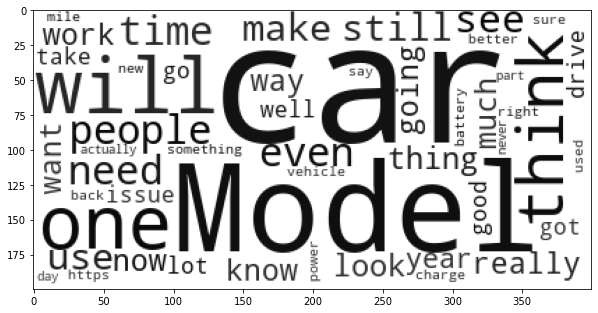

In [19]:
stp = STOPWORDS.copy() #we assign stop words to a variable
#we can also add more words to stp so wordcloud can filter it out, eg.'Tesla'
stp.add('Tesla')

#we put the stopwords in the parameter, so the wordcloud will ignore them
#the wordcloud also takes into account groups of words, bigrams, trigrams, etc...
#so if we dont want wordcloud to account for that, we can
#add another parameter (collocations = false).
wc = WordCloud(background_color="white", max_words=50, stopwords=stp)

# generate word cloud
wc.generate(sample)

plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func =grey_color_func, random_state=3))
plt.show()

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer, VaderConstants

#First, we initialize VADER so we can use it within our Python script.
sid = SentimentIntensityAnalyzer()


In [25]:
#this function identify the sentence passed and give a sentiment scores.
#compound means the overall sentiment (if the compound is negative, then
#it's a negative sentiment)
sid.polarity_scores('I am very happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [28]:
#adding sentiment score to the word 'people'
new_words = {
    'people': -1000,
    'car': 1000
}

sid.lexicon.update(new_words) #update the lexicon with a dictionary of words:score

In [30]:
sid.polarity_scores('There are some people')

{'neg': 0.997, 'neu': 0.003, 'pos': 0.0, 'compound': -1.0}

In [31]:
sid.polarity_scores('There are some car')

{'neg': 0.0, 'neu': 0.003, 'pos': 0.997, 'compound': 1.0}

In [32]:
#Instead of doing the scoring over 200,000+ rows, we will use a subset
df = comments[comments.Key<101] 
df.shape

(6267, 4)

In [33]:
#The cleaning steps as outlined earlier
df.Reply = df.Reply.apply(lambda x: re.sub(r'\?http\S+', '', x))
df.Reply= df.Reply.apply(lambda x: ' '.join(nltk.word_tokenize(x)))

C:\Users\Sky\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [34]:
df.head(2)

,Reply,Time,Upvote,Key
0,> * New buyers can order wraps for their cars ...,6/08/2020 22:42,779,1
1,I hope their wraps are better than their paint .,6/08/2020 22:37,408,1


In [35]:
#Adding neg, neu, pos, compound columns to the dataframe
#The values that go into these columns are from the function
#sid.polarity_scores().
df[['neg', 'neu', 'pos', 'compound']] = df.Reply.apply(lambda x: pd.Series(sid.polarity_scores(x)))

C:\Users\Sky\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [36]:
df.head(3)

,Reply,Time,Upvote,Key,neg,neu,pos,compound
0,> * New buyers can order wraps for their cars ...,6/08/2020 22:42,779,1,0.000,0.950,0.050,0.4019
1,I hope their wraps are better than their paint .,6/08/2020 22:37,408,1,0.000,0.508,0.492,0.7003
2,I ’ d leave it to the experts…,6/08/2020 23:04,823,1,0.231,0.769,0.000,-0.0516


In [42]:
from textblob.sentiments import NaiveBayesAnalyzer, PatternAnalyzer
from textblob import Blobber

#setting the analyzer and assign it to a tba variable
tba = Blobber(analyzer=NaiveBayesAnalyzer())

In [43]:
#give the sentence a sentiment score, with a classification, etc..
tba('My life is a frictionless slide downhill').sentiment

Sentiment(classification='neg', p_pos=0.374939442175929, p_neg=0.6250605578240714)

In [44]:
#we will use a subset
df = comments[comments.Key<101]

In [45]:
#The cleaning steps as outlined earlier
df.Reply = df.Reply.apply(lambda x: re.sub(r'\?http\S+', '', x))
df.Reply= df.Reply.apply(lambda x: ' '.join(nltk.word_tokenize(x)))

C:\Users\Sky\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [46]:
#creating and add new columns to the database
#we have to extract each element because the Textblob .sentiment method doesnt
#return a dictionary like Vader.
df[['Classification', 'positive', 'negative']] = df.Reply.apply(lambda x: pd.Series({'Classification':tba(x).sentiment[0],
                                                                                    'positive':tba(x).sentiment[1],
                                                                                    'negative':tba(x).sentiment[2]}))

C:\Users\Sky\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [47]:
df.head(3)

,Reply,Time,Upvote,Key,Classification,positive,negative
0,> * New buyers can order wraps for their cars ...,6/08/2020 22:42,779,1,pos,0.999638,0.000362
1,I hope their wraps are better than their paint .,6/08/2020 22:37,408,1,pos,0.581465,0.418535
2,I ’ d leave it to the experts…,6/08/2020 23:04,823,1,pos,0.572745,0.427255
